<h1 style="text-align: center">EIGENFACES</h1>
<hr>
    
    Um dos usos mais icônicos da decomposição SVD de matrizes é chamado de eigenfaces. É utilizado a decomposição PCA (uma versão
    reduzida do SVD, a qual é considerado apenas os elementos mais significativos para a matriz final ) em um dataset de treinamento
    que contém imagens variadas de pessoas. Resultando em uma quantidade x de eigenfaces, que servirão como base para reconstruir
    imagens.

<h3>Importando bibliotecas</h3>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from itertools import chain
import numpy as np
import os
import scipy.io
import glob
from PIL import Image

<h3>Construindo a matriz de imagens</h3>

Cada imagem possui uma largura de n pixels e altura de m pixels (m x n). Para facilitar o uso das imagens em uma matriz, cada uma será transformada em um vetor coluna (1 x mn). Como o ilustrado na imagem:
<div style="text-align: center">
    <img src="imagens/ilustraçoes03.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [2]:
# Cria uma lista com todos os nomes das imagens
filenames = [img for img in glob.glob("lfw*/*.jpg")]

# Cria uma lista vazia com a quantidade de imagens na pasta
# m = [[] for i in range(2500)]

m = np.zeros((2500, 250*250))

# Transforma as imagens 250x250 em vetores de 62500 linhas e transforma em uma matriz numpy
for i in range(2500):
  m[i] = np.array(Image.open(filenames[i]).convert('L').getdata())


Temos 2500 imagens e sendo assim nossa matriz terá 2500 colunas. A quantidade de linhas é definida pela multiplicação da largura pela altura da imagem em pixels. Nesse caso 250 x 250 = 62500

<div style="text-align: center">
    <img src="imagens/ilustraçoes01.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [6]:
m.shape

(2500, 62500)

<h3> Decomposição SVD e eigenfaces</h3>

In [32]:
# Quantidade de imagens para o treinamento
training_faces = m[:1000]

# Criação da face "média"
avg_faces = np.mean(training_faces, axis = 0)

# Calculo da decomposição svd
X = training_faces - np.tile(avg_faces, (training_faces.shape[0], 1))
X = X.T
U, S, VT = np.linalg.svd(X, full_matrices = 0)


KeyboardInterrupt: 

Após feita a decomposição SVD, obtemos três matrizes:

<div style="text-align: center">
    <img src="imagens/ilustraçoes02.png" alt="ilustração das imagens em vetores" width=900>
</div>

(-0.5, 249.5, 249.5, -0.5)

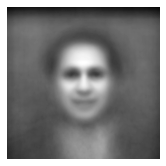

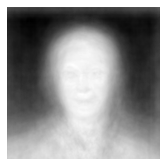

In [27]:
#   plotando as duas primeiras eigenfaces
fig1 =  plt.figure()
ax1 = fig1.add_subplot(122)
img_avg = ax1.imshow(np.reshape(avg_faces, (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(U[:, 0], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")


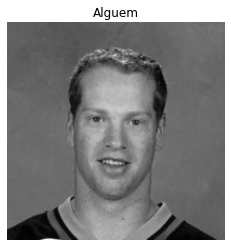

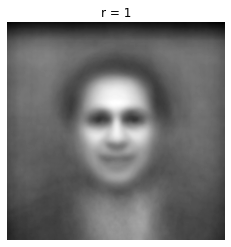

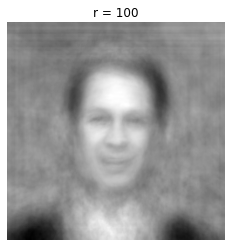

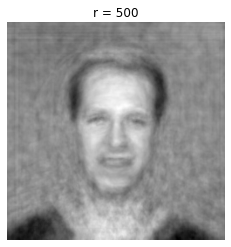

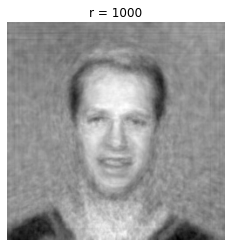

In [30]:
# plotando a imagem de alguem que não está no treinamento
testface = m[1509]
plt.imshow(np.reshape(testface, (250, 250)))
plt.set_cmap("gray")
plt.title("Alguem")
plt.axis("off")
plt.show()

# Reconstruindo um rosto de uma pessoa que não estava no treinamento
testfaceMS = testface - avg_faces
testfaceMS = testfaceMS.T
r_list = [1, 100, 500, 1000]

# plotando a reconstrução com diferentes quantidades de valores principais
for r in r_list:
    reconface = avg_faces.T + np.matmul(U[:,:r], np.matmul(U[:, :r].T, testfaceMS))
    img = plt.imshow(np.reshape(reconface, (250, 250)))
    img.set_cmap("gray")
    plt.title("r = " + str(r))
    plt.axis("off")
    plt.show()



<hr>
<div style="text-align: right; font-size: 12px; line-height: 10px;"> 
    <p>Um trabalho feito por:</p>
    <p>Gustavo Sanches</p>
    <p>Kayo Yokoyama</p></div>